In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic = pd.read_csv("titanic/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic[titanic['Age'].isnull()].shape

(177, 12)

In [4]:
titanic.apply(lambda x: x.factorize()[0]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,-1,0
1,1,1,1,1,1,1,0,0,1,1,0,1
2,2,1,0,2,1,2,1,0,2,2,-1,0
3,3,1,1,3,1,3,0,0,3,3,1,0
4,4,0,0,4,0,3,1,0,4,4,-1,0


In [5]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
titanic.apply(lambda x: x.factorize()[0]).corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.120150,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030323
Survived,-0.005007,1.000000,0.247845,-0.005007,0.543351,0.042743,-0.136302,0.086210,-0.047298,0.191981,0.270495,0.101849
Pclass,0.018305,0.247845,1.000000,0.018305,0.118133,0.180735,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168809
Name,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.120150,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030323
Sex,-0.042939,0.543351,0.118133,-0.042939,1.000000,0.009117,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.111249
Age,0.120150,0.042743,0.180735,0.120150,0.009117,1.000000,0.003777,0.136160,0.070385,0.114674,0.165159,-0.152716
SibSp,-0.031023,-0.136302,-0.149630,-0.031023,-0.046152,0.003777,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030612
Parch,0.001206,0.086210,-0.000343,0.001206,0.242417,0.136160,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.082982
Ticket,0.760875,-0.047298,0.020431,0.760875,-0.132709,0.070385,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.020135
Fare,0.299982,0.191981,0.079498,0.299982,0.137725,0.114674,-0.046556,0.074306,0.303257,1.000000,0.379659,0.077933


there is alot of corrolation between Survived and Sex. and a little with Pclass, Cabin, Fare and a little negative correlation with SibSp.

In [7]:
titanic.shape

(891, 12)

In [8]:
titanic[titanic['Survived'] == 1].shape

(342, 12)

In [9]:
titanic[(titanic['Survived'] == 1) & (titanic['Sex'] == "female")].shape

(233, 12)

In [10]:
titanic[titanic['Sex'] == "female"].shape

(314, 12)

38 percent of test passengers have survived and from those 68 percent were female although females were only 35 percent of population.

In [11]:
titanic[(titanic['Survived'] == 1) & (titanic['Sex'] == "female") & (titanic['SibSp'] == 0) & (titanic['Parch'] == 0)].shape

(99, 12)

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic['Family'] = titanic['SibSp']+titanic['Parch']
conditions = [
    (titanic['Fare'] <= 7.910400),
    (titanic['Fare'] <= 14.454200),
    (titanic['Fare'] <= 31.000000),
    (titanic['Fare'] > 31.000000)]
choices = [0, 1, 2, 3]
titanic['FareGroup'] = np.select(conditions, choices, default=4)
conditions = [
    (titanic['Age'] <= 4),
    (titanic['Age'] <= 10),
    (titanic['Age'] <= 18),
    (titanic['Age'] <= 35),
    (titanic['Age'] <= 55),
    (titanic['Age'] < 80),
    (titanic['Age'] >=  80),]
choices = [0, 1, 2, 3, 4, 5, 6]
titanic['AgeGroup'] = np.select(conditions, choices, default=7)
conditions = [
    (titanic['Age'] <= 10),
    (titanic['Age'] <= 18),
    (titanic['Age'] <= 35),
    (titanic['Age'] <= 55),
    (titanic['Age'] >  55)]
choices = [0, 1, 2, 3, 4]
titanic['AgeGroup'] = np.select(conditions, choices, default=5)
conditions = [
    (titanic['Age'] <= 10) & (titanic['Parch'] != 0),
    (titanic['Age'] >  18) & ((titanic['SibSp'] != 0) | (titanic['Parch'] != 0))]
choices = [0, 1]
titanic['HadSupport'] = np.select(conditions, choices, default=2)
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,FareGroup,AgeGroup,HadSupport
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,2,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,5,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,3,3,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,2,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,2,1,2


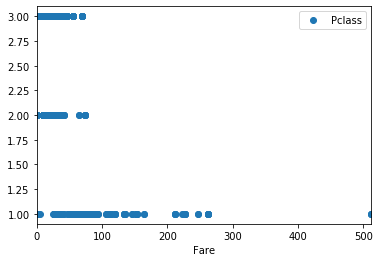

In [14]:
titanic.plot('Fare', 'Pclass', style='o')

In [15]:
titanic[titanic['Age']<12].shape

(68, 16)

In [16]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,FareGroup,AgeGroup,HadSupport
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,-0.022998,-0.006416,0.038304
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.299357,-0.129664,-0.185232
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.634271,-0.038456,0.098151
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.086846,0.932701,0.306077
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,0.393025,-0.152927,-0.420190
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,0.393881,-0.225795,-0.529585
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,0.579345,-0.033797,-0.175044
Family,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,0.465396,-0.217324,-0.551757
FareGroup,-0.022998,0.299357,-0.634271,0.086846,0.393025,0.393881,0.579345,0.465396,1.000000,-0.127223,-0.438321
AgeGroup,-0.006416,-0.129664,-0.038456,0.932701,-0.152927,-0.225795,-0.033797,-0.217324,-0.127223,1.000000,0.463948


In [17]:
titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [18]:
titanic[['Family', 'Sex', 'Survived']].groupby(['Family', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Sex,Survived
6,3,female,0.842105
2,1,female,0.816092
0,0,female,0.785714
4,2,female,0.775510
7,3,male,0.500000
5,2,male,0.396226
10,5,female,0.375000
12,6,female,0.375000
8,4,female,0.250000
13,6,male,0.250000


In [19]:
titanic[['SibSp', 'Sex', 'Survived']].groupby(['SibSp', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Sex,Survived
0,0,female,0.787356
4,2,female,0.769231
2,1,female,0.754717
6,3,female,0.363636
8,4,female,0.333333
3,1,male,0.310680
5,2,male,0.200000
1,0,male,0.168203
9,4,male,0.083333
7,3,male,0.000000


In [20]:
titanic[['Parch', 'Sex', 'Survived']].groupby(['Parch', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Sex,Survived
0,0,female,0.788660
2,1,female,0.766667
6,3,female,0.750000
4,2,female,0.612245
3,1,male,0.327586
5,2,male,0.322581
10,5,female,0.250000
1,0,male,0.165289
7,3,male,0.000000
8,4,female,0.000000


In [21]:
titanic[['Parch', 'SibSp', 'Survived']].groupby(['Parch', 'SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,SibSp,Survived
16,3,0,1.000000
3,0,3,1.000000
18,3,2,1.000000
6,1,2,0.857143
9,2,0,0.724138
4,1,0,0.657895
10,2,1,0.631579
5,1,1,0.596491
1,0,1,0.520325
11,2,2,0.500000


In [22]:
titanic[['Parch', 'SibSp', 'Sex', 'Survived']].groupby(['Parch', 'SibSp', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,SibSp,Sex,Survived
32,3,2,female,1.000000
6,0,3,female,1.000000
29,3,0,female,1.000000
11,1,2,female,1.000000
7,1,0,female,0.875000
16,2,0,female,0.800000
2,0,1,female,0.793651
0,0,0,female,0.785714
9,1,1,female,0.769231
18,2,1,female,0.727273


In [23]:
titanic[['HadSupport', 'Sex', 'Survived']].groupby(['HadSupport', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,HadSupport,Sex,Survived
2,1,female,0.768519
4,2,female,0.750000
0,0,female,0.600000
1,0,male,0.575758
3,1,male,0.202020
5,2,male,0.157303


In [24]:
titanic[['AgeGroup', 'Sex', 'Survived']].groupby(['AgeGroup', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeGroup,Sex,Survived
8,4,female,0.888889
4,2,female,0.783333
6,3,female,0.765625
2,1,female,0.729730
10,5,female,0.679245
0,0,female,0.612903
1,0,male,0.575758
7,3,male,0.194690
5,2,male,0.180672
3,1,male,0.131579


In [25]:
titanic[titanic['AgeGroup'] > 5].shape

(0, 16)

In [26]:
titanic = titanic.drop(['Ticket', 'Cabin'], axis=1)

In [27]:
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic['Title'], titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
    
titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
titanic.apply(lambda x: x.factorize()[0]).corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FareGroup,AgeGroup,HadSupport,Title
PassengerId,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.120150,-0.031023,0.001206,0.299982,-0.030323,0.020126,-0.049694,-0.004610,0.012214,-0.025145
Survived,-0.005007,1.000000,0.247845,-0.005007,0.543351,0.042743,-0.136302,0.086210,0.191981,0.101849,0.004259,0.113977,0.011706,-0.047046,0.405921
Pclass,0.018305,0.247845,1.000000,0.018305,0.118133,0.180735,-0.149630,-0.000343,0.079498,-0.168809,-0.039022,0.306997,-0.070235,-0.191101,0.109558
Name,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.120150,-0.031023,0.001206,0.299982,-0.030323,0.020126,-0.049694,-0.004610,0.012214,-0.025145
Sex,-0.042939,0.543351,0.118133,-0.042939,1.000000,0.009117,-0.046152,0.242417,0.137725,0.111249,0.093748,0.111790,0.039375,-0.121670,0.564438
Age,0.120150,0.042743,0.180735,0.120150,0.009117,1.000000,0.003777,0.136160,0.114674,-0.152716,0.081483,0.119409,0.097994,-0.086286,0.086466
SibSp,-0.031023,-0.136302,-0.149630,-0.031023,-0.046152,0.003777,1.000000,0.165255,-0.046556,-0.030612,0.498478,-0.056057,0.124158,0.292152,0.137631
Parch,0.001206,0.086210,-0.000343,0.001206,0.242417,0.136160,0.165255,1.000000,0.074306,-0.082982,0.705955,0.160330,0.169036,-0.080561,0.268174
Fare,0.299982,0.191981,0.079498,0.299982,0.137725,0.114674,-0.046556,0.074306,1.000000,0.077933,0.041541,-0.002189,0.049850,-0.082043,0.139345
Embarked,-0.030323,0.101849,-0.168809,-0.030323,0.111249,-0.152716,-0.030612,-0.082982,0.077933,1.000000,-0.079424,-0.172778,0.131740,0.032466,0.117206


In [30]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

In [31]:
freq_port = titanic.Embarked.dropna().mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(freq_port)

In [32]:
titanic['Fare'].fillna(titanic['Fare'].dropna().median(), inplace=True)

In [33]:
conditions = [
    (titanic['Family'] == 0)]
choices = [1]
titanic['isAlone'] = np.select(conditions, choices, default=0)

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FareGroup,AgeGroup,HadSupport,Title,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,2,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3,3,1,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,2,2,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3,2,1,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,2,2,1,1


In [35]:
titanic = titanic.drop(['Name', 'Age', 'Fare', 'Family', 'PassengerId'], axis=1)
titanic = titanic.apply(lambda x: x.factorize()[0])
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FareGroup,AgeGroup,HadSupport,Title,isAlone
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,1,1,0,1,0
2,1,0,1,1,0,0,2,0,1,2,1
3,1,1,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,2,0,1,0,1


In [36]:
X_train = titanic.drop("Survived", axis=1)[:-178]
X_test = titanic.drop("Survived", axis=1)[-178:]
Y_train = titanic["Survived"][:-178]
Y_test = titanic["Survived"][-178:]
Y_train.shape

(713,)

# Prediction

In [37]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\PSS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.24

In [38]:
rms_acc_log = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_log

0.4370483222197017

In [39]:
coeff_df = pd.DataFrame(titanic.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.976352
0,Pclass,0.681106
7,HadSupport,0.385754
8,Title,0.350248
4,Embarked,0.288728
5,FareGroup,-0.075456
6,AgeGroup,-0.112292
3,Parch,-0.245713
2,SibSp,-0.315260
9,isAlone,-0.541948


In [40]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\Users\PSS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.03

In [41]:
rms_acc_svc = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_svc

0.4173215826802953

In [42]:
# K-Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.99

In [43]:
rms_acc_knn = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_knn

0.423999152002544

In [44]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.38

In [45]:
rms_acc_gaussian = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_gaussian

0.423999152002544

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

65.36

In [47]:
rms_acc_perceptron = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_perceptron

0.5507910552258941

In [48]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\PSS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.24

In [49]:
rms_acc_linear_svc = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_linear_svc

0.43057317430021846

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.79

In [51]:
rms_acc_sgd = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_sgd

0.49718307617612556

In [52]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.9

In [53]:
rms_acc_decision_tree = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_decision_tree

0.4370483222197017

In [54]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.9

In [55]:
rms_acc_random_forest = np.sqrt(mean_squared_error(Y_test, Y_pred))
rms_acc_random_forest

0.40363516734125976

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.90
8,Decision Tree,89.90
1,KNN,84.99
0,Support Vector Machines,83.03
4,Naive Bayes,79.38
2,Logistic Regression,79.24
7,Linear SVC,79.24
6,Stochastic Gradient Decent,72.79
5,Perceptron,65.36


In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [rms_acc_svc, rms_acc_knn, rms_acc_log, 
              rms_acc_random_forest, rms_acc_gaussian, rms_acc_perceptron, 
              rms_acc_sgd, rms_acc_linear_svc, rms_acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Perceptron,0.550791
6,Stochastic Gradient Decent,0.497183
2,Logistic Regression,0.437048
8,Decision Tree,0.437048
7,Linear SVC,0.430573
1,KNN,0.423999
4,Naive Bayes,0.423999
0,Support Vector Machines,0.417322
3,Random Forest,0.403635


based on the two tables above it seems Random Forest gave best result

In [58]:
# submission

In [59]:
titanic = pd.read_csv("titanic/test.csv")
titanic['Family'] = titanic['SibSp']+titanic['Parch']
conditions = [
    (titanic['Fare'] <= 7.910400),
    (titanic['Fare'] <= 14.454200),
    (titanic['Fare'] <= 31.000000),
    (titanic['Fare'] > 31.000000)]
choices = [0, 1, 2, 3]
titanic['FareGroup'] = np.select(conditions, choices, default=4)
conditions = [
    (titanic['Age'] <= 4),
    (titanic['Age'] <= 10),
    (titanic['Age'] <= 18),
    (titanic['Age'] <= 35),
    (titanic['Age'] <= 55),
    (titanic['Age'] < 80),
    (titanic['Age'] >=  80),]
choices = [0, 1, 2, 3, 4, 5, 6]
titanic['AgeGroup'] = np.select(conditions, choices, default=7)
conditions = [
    (titanic['Age'] <= 10),
    (titanic['Age'] <= 18),
    (titanic['Age'] <= 35),
    (titanic['Age'] <= 55),
    (titanic['Age'] >  55)]
choices = [0, 1, 2, 3, 4]
titanic['AgeGroup'] = np.select(conditions, choices, default=5)
conditions = [
    (titanic['Age'] <= 10) & (titanic['Parch'] != 0),
    (titanic['Age'] >  18) & ((titanic['SibSp'] != 0) | (titanic['Parch'] != 0))]
choices = [0, 1]
titanic['HadSupport'] = np.select(conditions, choices, default=2)
titanic = titanic.drop(['Ticket', 'Cabin'], axis=1)
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

freq_port = titanic.Embarked.dropna().mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(freq_port)

titanic['Fare'].fillna(titanic['Fare'].dropna().median(), inplace=True)

conditions = [
    (titanic['Family'] == 0)]
choices = [1]
titanic['isAlone'] = np.select(conditions, choices, default=0)

titanic = titanic.drop(['Name', 'Age', 'Fare', 'Family', 'PassengerId'], axis=1)
titanic = titanic.apply(lambda x: x.factorize()[0])

In [60]:
titanic2 = pd.read_csv("titanic/test.csv")
identification = titanic2['PassengerId']

In [61]:
Y_pred = svc.predict(titanic)

In [62]:
submission = pd.DataFrame({
        "PassengerId": identification,
        "Survived": Y_pred
    })

In [63]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [64]:
submission.to_csv('output/submission.csv', index=False)

in the end svm gave better score on test result with 0.79425 accurecy